[Pandas](https://pandas.pydata.org/) is a Python library providing high-performance, data structures and analysis tools.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# lets start with series:
pd.Series?

In [3]:
x = pd.Series([1, 2, None])
x

0    1.0
1    2.0
2    NaN
dtype: float64

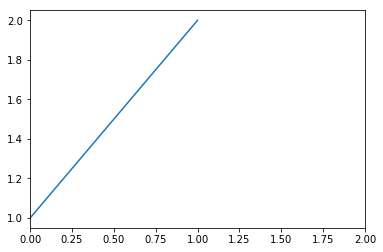

In [4]:
x.plot()

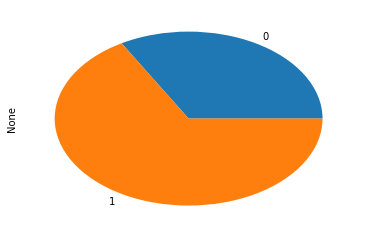

In [5]:
x.plot(kind='pie')

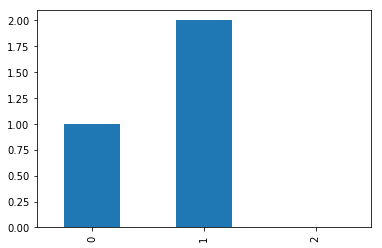

In [6]:
x.plot(kind='bar')

In [7]:
# can also be objects:
animals = ['Tiger', 'Bear', 'Moose']
pd.Series(animals)

0    Tiger
1     Bear
2    Moose
dtype: object

In [8]:
# with indexes:
s = pd.Series(['Tiger', 'Bear', 'Moose'], index=['India', 'America', 'Canada'])
s

India      Tiger
America     Bear
Canada     Moose
dtype: object

In [9]:
s.index

Index(['India', 'America', 'Canada'], dtype='object')

In [10]:
# can be accessed by index:
s.loc['India']

'Tiger'

In [11]:
s.iloc[0]

'Tiger'

In [12]:
s[:'India']

India    Tiger
dtype: object

In [13]:
s[:1]

India    Tiger
dtype: object

In [14]:
# and modified as well:
s['America'] = 'Eagle'
s

India      Tiger
America    Eagle
Canada     Moose
dtype: object

In [15]:
# indexes can be modified as well:
s.rename(index={'America': 'USA'}, inplace=True)
s

India     Tiger
USA       Eagle
Canada    Moose
dtype: object

In [16]:
# lets take a look ta data frames:
pd.DataFrame?

In [17]:
purchase_1 = pd.Series({'Name': 'Chris',
                        'Item Purchased': 'Dog Food',
                        'Cost': 22.50})
purchase_2 = pd.Series({'Name': 'Kevyn',
                        'Item Purchased': 'Kitty Litter',
                        'Cost': 2.50})
purchase_3 = pd.Series({'Name': 'Vinod',
                        'Item Purchased': 'Bird Seed',
                        'Cost': 5.00})
df = pd.DataFrame([purchase_1, purchase_2, purchase_3], index=['Store 1', 'Store 1', 'Store 2'])
df.head()

,Cost,Item Purchased,Name
Store 1,22.5,Dog Food,Chris
Store 1,2.5,Kitty Litter,Kevyn
Store 2,5.0,Bird Seed,Vinod


In [18]:
# again, access by index:
df.loc['Store 1', 'Cost']

Store 1    22.5
Store 1     2.5
Name: Cost, dtype: float64

In [19]:
df['Cost']['Store 1']

Store 1    22.5
Store 1     2.5
Name: Cost, dtype: float64

In [20]:
sel = (df['Name'] == 'Kevyn') | (df['Name'] == 'Vinod')
sel

Store 1    False
Store 1     True
Store 2     True
Name: Name, dtype: bool

In [21]:
list(df[sel]['Item Purchased'])

['Kitty Litter', 'Bird Seed']

In [22]:
# now, lets see how to read a CSV file (similar works for TSV, JSON and Excel):
# see https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html for more options
df = pd.read_csv('data/census.csv', encoding = "ISO-8859-1")
df

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411
6,50,3,6,1,11,Alabama,Bullock County,10914,10915,10887,...,-30.953709,-5.180127,-1.130263,14.354290,-16.167247,-29.001673,-2.825524,1.507017,17.243790,-13.193961
7,50,3,6,1,13,Alabama,Butler County,20947,20946,20944,...,-14.032727,-11.684234,-5.655413,1.085428,-6.529805,-13.936612,-11.586865,-5.557058,1.184103,-6.430868
8,50,3,6,1,15,Alabama,Calhoun County,118572,118586,118437,...,-6.155670,-4.611706,-5.524649,-4.463211,-3.376322,-5.791579,-4.092677,-5.062836,-3.912834,-2.806406
9,50,3,6,1,17,Alabama,Chambers County,34215,34170,34098,...,-2.731639,3.849092,2.872721,-2.287222,1.349468,-1.821092,4.701181,3.781439,-1.290228,2.346901


In [23]:
# do some pandorable transformations:
df = (df
    .where(df['SUMLEV']==50)
    .dropna()
    .set_index(['STNAME','CTYNAME'])
    .rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'}))

df

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME    CTYNAME                                                       
Alabama   Autauga County        50.0     3.0       6.0    1.0     1.0   
          Baldwin County        50.0     3.0       6.0    1.0     3.0   
          Barbour County        50.0     3.0       6.0    1.0     5.0   
          Bibb County           50.0     3.0       6.0    1.0     7.0   
          Blount County         50.0     3.0       6.0    1.0     9.0   
          Bullock County        50.0     3.0       6.0    1.0    11.0   
          Butler County         50.0     3.0       6.0    1.0    13.0   
          Calhoun County        50.0     3.0       6.0    1.0    15.0   
          Chambers County       50.0     3.0       6.0    1.0    17.0   
          Cherokee County       50.0     3.0       6.0    1.0    19.0   
          Chilton County        50.0     3.0       6.0    1.0    21.0   
          Choctaw County        50.0     3.0       6.0    1.0    23.0   
          Clarke County         50.0     3.0       6.0    1.0    25.0   
          Clay County           50.0     3.0       6.0    1.0    27.0   
          Cleburne County       50.0     3.0       6.0    1.0    29.0   
          Coffee County         50.0     3.0       6.0    1.0    31.0   
          Colbert County        50.0     3.0       6.0    1.0    33.0   
          Conecuh County        50.0     3.0       6.0    1.0    35.0   
          Coosa County          50.0     3.0       6.0    1.0    37.0   
          Covington County      50.0     3.0       6.0    1.0    39.0   
          Crenshaw County       50.0     3.0       6.0    1.0    41.0   
          Cullman County        50.0     3.0       6.0    1.0    43.0   
          Dale County           50.0     3.0       6.0    1.0    45.0   
          Dallas County         50.0     3.0       6.0    1.0    47.0   
          DeKalb County         50.0     3.0       6.0    1.0    49.0   
          Elmore County         50.0     3.0       6.0    1.0    51.0   
          Escambia County       50.0     3.0       6.0    1.0    53.0   
          Etowah County         50.0     3.0       6.0    1.0    55.0   
          Fayette County        50.0     3.0       6.0    1.0    57.0   
          Franklin County       50.0     3.0       6.0    1.0    59.0   
...                              ...     ...       ...    ...     ...   
Wisconsin Washburn County       50.0     2.0       3.0   55.0   129.0   
          Washington County     50.0     2.0       3.0   55.0   131.0   
          Waukesha County       50.0     2.0       3.0   55.0   133.0   
          Waupaca County        50.0     2.0       3.0   55.0   135.0   
          Waushara County       50.0     2.0       3.0   55.0   137.0   
          Winnebago County      50.0     2.0       3.0   55.0   139.0   
          Wood County           50.0     2.0       3.0   55.0   141.0   
Wyoming   Albany County         50.0     4.0       8.0   56.0     1.0   
          Big Horn County       50.0     4.0       8.0   56.0     3.0   
          Campbell County       50.0     4.0       8.0   56.0     5.0   
          Carbon County         50.0     4.0       8.0   56.0     7.0   
          Converse County       50.0     4.0       8.0   56.0     9.0   
          Crook County          50.0     4.0       8.0   56.0    11.0   
          Fremont County        50.0     4.0       8.0   56.0    13.0   
          Goshen County         50.0     4.0       8.0   56.0    15.0   
          Hot Springs County    50.0     4.0       8.0   56.0    17.0   
          Johnson County        50.0     4.0       8.0   56.0    19.0   
          Laramie County        50.0     4.0       8.0   56.0    21.0   
          Lincoln County        50.0     4.0       8.0   56.0    23.0   
          Natrona County        50.0     4.0       8.0   56.0    25.0   
          Niobrara County       50.0     4.0       8.0   56.0    27.0   
          Park County           50.0     4.0       8.0   56.0    29.0   
          Platt

In [24]:
# do some simple computations:
columns = ['POPESTIMATE2010', 'POPESTIMATE2011', 'POPESTIMATE2012', 'POPESTIMATE2013', 'POPESTIMATE2014', 'POPESTIMATE2015']
x = df.apply(lambda x: np.max(x[columns]), axis=1)
print(type(x))
x.head()

<class 'pandas.core.series.Series'>


STNAME   CTYNAME       
Alabama  Autauga County     55347.0
         Baldwin County    203709.0
         Barbour County     27341.0
         Bibb County        22861.0
         Blount County      57776.0
dtype: float64

In [25]:
# or grouping aggration:
x = df.groupby(level=0)['CENSUS2010POP'].agg([np.average, np.sum])
print(type(x))
x.head()

<class 'pandas.core.frame.DataFrame'>


,average,sum
STNAME,,
Alabama,71339.343284,4779736.0
Alaska,24490.724138,710231.0
Arizona,426134.466667,6392017.0
Arkansas,38878.906667,2915918.0
California,642309.586207,37253956.0


In [26]:
# one more thing:
cars = pd.read_csv('data/cars.csv')
cars

,YEAR,Make,Model,Size,(kW),Unnamed: 5,TYPE,CITY (kWh/100 km),HWY (kWh/100 km),COMB (kWh/100 km),CITY (Le/100 km),HWY (Le/100 km),COMB (Le/100 km),(g/km),RATING,(km),TIME (h)
0,2012,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,n/a,100,7
1,2012,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,n/a,117,7
2,2013,FORD,FOCUS ELECTRIC,COMPACT,107,A1,B,19.0,21.1,20.0,2.1,2.4,2.2,0,n/a,122,4
3,2013,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,n/a,100,7
4,2013,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,n/a,117,7
5,2013,SMART,FORTWO ELECTRIC DRIVE CABRIOLET,TWO-SEATER,35,A1,B,17.2,22.5,19.6,1.9,2.5,2.2,0,n/a,109,8
6,2013,SMART,FORTWO ELECTRIC DRIVE COUPE,TWO-SEATER,35,A1,B,17.2,22.5,19.6,1.9,2.5,2.2,0,n/a,109,8
7,2013,TESLA,MODEL S (40 kWh battery),FULL-SIZE,270,A1,B,22.4,21.9,22.2,2.5,2.5,2.5,0,n/a,224,6
8,2013,TESLA,MODEL S (60 kWh battery),FULL-SIZE,270,A1,B,22.2,21.7,21.9,2.5,2.4,2.5,0,n/a,335,10
9,2013,TESLA,MODEL S (85 kWh battery),FULL-SIZE,270,A1,B,23.8,23.2,23.6,2.7,2.6,2.6,0,n/a,426,12


In [27]:
# pivoting is awesome!
cars.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=[np.mean], margins=True)


mean                                                             \
Make    BMW CHEVROLET   FORD   KIA MITSUBISHI NISSAN SMART       TESLA   
YEAR                                                                     
2012    NaN       NaN    NaN   NaN       49.0   80.0   NaN         NaN   
2013    NaN       NaN  107.0   NaN       49.0   80.0  35.0  280.000000   
2014    NaN     104.0  107.0   NaN       49.0   80.0  35.0  268.333333   
2015  125.0     104.0  107.0  81.0       49.0   80.0  35.0  320.666667   
2016  125.0     104.0  107.0  81.0       49.0   80.0  35.0  409.700000   
All   125.0     104.0  107.0  81.0       49.0   80.0  35.0  345.478261   

                  
Make         All  
YEAR              
2012   64.500000  
2013  158.444444  
2014  135.000000  
2015  181.428571  
2016  252.263158  
All   190.622642

For more fun stuff take a look at [10 minute Pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html) or attend [Applied Data Science with Python](https://www.coursera.org/learn/python-data-analysis)